# 확률적 경사 하강법

## 1. SGDClassifier

In [22]:
import pandas as pd

In [23]:
# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


In [24]:
# 넘파이 배열로 변환
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [27]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)

c:\Users\cyh51\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [29]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [30]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 2. 에포크와 과대/과소적합

In [31]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

In [32]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

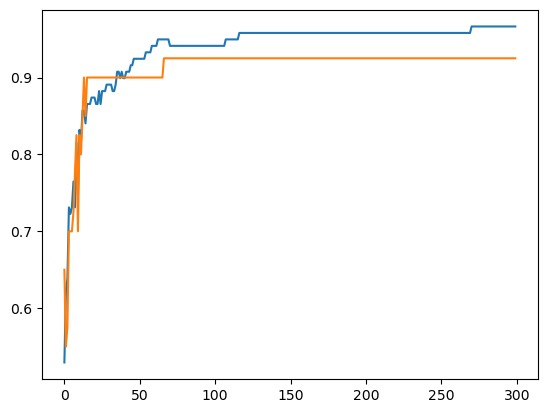

In [33]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

In [34]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
